# **Music Genre Classification 2024**

**Note: The target column is 'Class'**

### Features



__artist__: Name of the Artist.

__song__: Name of the Track.

__popularity__: The higher the value the more popular the song is.

__danceability__: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm

__energy__: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

__key__: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

__loudness__: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

__mode__: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

__speechiness__: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- Values above 0.66 describe tracks that are probably made entirely of spoken words.
- Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.
-  Values below 0.33 most likely represent music and other non-speech-like tracks.

__acousticness__: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
1.0 represents high confidence the track is acoustic.

__instrumentalness__: Predicts whether a track contains no vocals.
 "Ooh" and "aah" sounds are treated as instrumental in this context.
  Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

__liveness__: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

__valence__: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

 Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

__tempo__: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

__duration in milliseconds__ :Time of the song

__time_signature__ : a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

__Class__: Genre of the track.

### Importing all the required libraries

In [2]:
# Import the necessary libraries
# Import necessary libraries for Data Analysis and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

# Import necessary libraries for Descriptive Analytic Techniques
from scipy.stats import variation
from statistics import quantiles
from numpy.lib.function_base import quantile
import scipy.stats as stats
import matplotlib.pyplot as pl

#Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb

import catboost as cb
from sklearn.ensemble import StackingClassifier
import lightgbm as lgb

# Feature Selection
from sklearn.feature_selection import SelectFromModel


#Evaluation Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Data Accessing

In [3]:
# Load the Data
train_data = pd.read_csv('/content/train (1).csv')

## Data Info

In [4]:
# Exploratory Data Analysis (EDA)

# Display the first five rows of the dataset
train_data.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [5]:
# Display basic information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [6]:
# Get the number of instances and features
num_instances, num_features = train_data.shape

print("Number of instances:", num_instances)
print("Number of features:", num_features)

Number of instances: 14396
Number of features: 18


In [7]:
# Dropping Irrelevant Columns
train_data = train_data.drop(["Id"], axis=1)

**Note**

The "Id" column is dropped as it's a unique identifier and doesn't contribute to predicting the music genre. Removing it simplifies the dataset and helps the model focus on relevant features.

In [8]:
# Get the number of instances and features
num_instances, num_features = train_data.shape

print("Number of instances:", num_instances)
print("Number of features:", num_features)

Number of instances: 14396
Number of features: 17


In [9]:
# identify all categorical variables
cat_columns = train_data.select_dtypes(['object']).columns
cat_columns

Index(['Artist Name', 'Track Name'], dtype='object')

As seen in the output of the code, both 'Artist Name' and 'Track Name' are already identified as categorical variables (object type).

In [10]:
num_cols = ['Popularity', 'danceability', 'energy', 'loudness',
            'speechiness', 'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'duration_in min/ms']

cat_cols = ['Artist Name','Track Name','mode', 'key', 'time_signature', 'Class']

**Note**

While the info() method might display certain features as numerical (float), it's crucial to recognize the underlying nature of the data for proper analysis. The following features, despite numerical representation, are fundamentally categorical:

- **'mode':** Represents the modality (major or minor) of a track, a categorical concept with distinct, non-ordinal values.
- **'key':** Utilizes Pitch Class notation, where integers map to distinct musical keys. While numerically represented, the relationship between these values is not continuous or ordinal.
- **'time_signature':** Indicates the rhythmic structure of a musical piece (e.g., 4/4, 3/4). While numerically represented, these values represent distinct categories, not a continuous scale.
- **'Class':** The target variable itself, representing the music genre, is inherently a categorical feature.

In [11]:
# Step: Data Preprocessing
# Preparing the Data - Data Cleaning

# Checking for Duplicate Rows
train_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
14391,False
14392,False
14393,False
14394,False


In [12]:
# Counting Duplicate Rows
train_data.duplicated().sum()

0

**Note**

Executed the code above to check for duplicates in the dataset. The result was , confirming that there are no duplicate entries present in the dataset. This ensures the integrity and uniqueness of each data point for subsequent analysis and model training.

In [13]:
# Preparing the Data - Data Cleaning

# Checking for Missing Values

print(train_data.isnull().sum())

Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


In [14]:
# Preparing the Data - Data Cleaning

# Handling missing values for numerical features

# Impute 'Popularity' and 'instrumentalness' with their median values
train_data['Popularity'].fillna(train_data['Popularity'].median(), inplace=True)
train_data['instrumentalness'].fillna(train_data['instrumentalness'].median(), inplace=True)

In [15]:
# Handling missing values for categorical feature 'key'

# Impute 'key' with the most frequent value
train_data['key'].fillna(train_data['key'].mode()[0], inplace=True)

In [16]:
# Verify that there are no missing values left
print(train_data.isnull().sum())

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64


In [17]:
# Descriptive Statistics

# Summary statistics for numerical columns
train_data[num_cols].describe()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
count,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,1.439600e+04
mean,44.513059,0.543105,0.662422,-7.900852,0.080181,0.246746,0.135278,0.195782,0.486379,122.695372,2.000942e+05
std,17.216466,0.165517,0.235967,4.057362,0.085157,0.310922,0.274652,0.159258,0.239476,29.538490,1.116891e+05
min,1.000000,0.059600,0.001210,-39.952000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01
25%,33.000000,0.432000,0.508000,-9.538000,0.034800,0.004280,0.000295,0.097275,0.299000,99.799000,1.654458e+05
50%,44.000000,0.545000,0.699000,-7.013500,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05
75%,56.000000,0.658000,0.861000,-5.162000,0.083100,0.432250,0.057600,0.256000,0.672000,141.988250,2.522470e+05
max,100.000000,0.989000,1.000000,1.342000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06


In [18]:
# Statstics

dispersion_data = {}

for col in num_cols:
    data_range = train_data[col].max() - train_data[col].min()
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    iqr = q3 - q1
    variance = train_data[col].var()
    std_dev = train_data[col].std()
    # Calculate Coefficient of Variation
    coeff_var = variation(train_data[col])
    dispersion_data[col] = [data_range, iqr, variance, coeff_var]

dispersion_df = pd.DataFrame(dispersion_data, index=['Range', 'IQR', 'Variance', 'Coefficient of Variation (CV)'])
dispersion_df

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
Range,99.000000,0.929400,0.998790,41.294000,0.932500,0.996000,0.995999,0.980100,0.964500,186.859000,1.477186e+06
IQR,23.000000,0.226000,0.353000,4.376000,0.048300,0.427970,0.057305,0.158725,0.373000,42.189250,8.680125e+04
Variance,296.406707,0.027396,0.055681,16.462188,0.007252,0.096672,0.075434,0.025363,0.057349,872.522420,1.247445e+10
Coefficient of Variation (CV),0.386760,0.304750,0.356207,-0.513517,1.062022,1.260047,2.030202,0.813415,0.492348,0.240738,5.581631e-01


**Insights**
- The wide **range of values** across most features, especially "Popularity", "loudness", "speechiness", "tempo", and "duration", indicates a diverse music dataset with potential outliers. This suggests the need for careful outlier handling and feature scaling to optimize model performance for genre classification.
- The **variance values** highlight the varying degrees of data spread for different features. "Popularity", "loudness", "tempo", and especially "duration_in min/ms" exhibit high variance, indicating a wide dispersion of values. This suggests a diverse dataset and potential need for feature scaling to ensure all features contribute equally during model training.
- The **IQR values** highlight varying degrees of spread within the central 50% of data for different features. "Popularity", "Tempo", and "Duration" stand out with larger IQRs, indicating greater variability in these aspects compared to others.
- The **Coefficient of Variation (CV) values** reveal the relative variability of different features. "Instrumentalness", "acousticness" and "speechiness" exhibit the highest CV, indicating greater variability relative to their mean values. This suggests these features might play a significant role in distinguishing between different music genres.

In [19]:
# --- Calculating Outlier Thresholds Using IQR ---

dispersion_data = {}

for col in num_cols:
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    iqr = q3 - q1
    # Calculate thresholds for identifying outliers
    upper_outlier_threshold = q3 + (1.5 * iqr)
    lower_outlier_threshold = q1 - (1.5 * iqr)

    dispersion_data[col] = [upper_outlier_threshold, lower_outlier_threshold]

dispersion_df = pd.DataFrame(dispersion_data, index=['Upper Outlier Threshold', 'Lower Outlier Threshold'])
dispersion_df

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
Upper Outlier Threshold,90.5,0.997,1.3905,1.402,0.15555,1.074205,0.143558,0.494088,1.2315,205.272125,382448.875
Lower Outlier Threshold,-1.5,0.093,-0.0215,-16.102,-0.03765,-0.637675,-0.085663,-0.140813,-0.2605,36.515125,35243.875


In [20]:
# Outlier detections

# Identify outliers in the Popularity column / IQR method:
IQR_outliers = train_data[(train_data['Popularity'] > 90.500000) | (train_data['Popularity'] < -1.500000)]

IQR_outliers[['Popularity','Class','danceability', 'acousticness', 'duration_in min/ms','tempo']] # 32 rows

,Popularity,Class,danceability,acousticness,duration_in min/ms,tempo
59,92.0,9,0.586,0.18200,4.034933,148.088
192,100.0,9,0.714,0.12700,3.526000,134.002
489,95.0,9,0.677,0.32100,3.301367,90.030
778,93.0,9,0.634,0.93700,245897.000000,129.650
831,95.0,9,0.762,0.23500,3.481117,110.968
1164,96.0,9,0.759,0.00323,2.740700,109.997
1364,95.0,9,0.702,0.00544,3.126417,124.925
1576,96.0,5,0.789,0.41000,165926.000000,81.039
1982,93.0,9,0.830,0.39900,182496.000000,171.959
2004,91.0,9,0.669,0.19400,150053.000000,125.993


**Insights**

Our analysis of the "Popularity" feature reveals a compelling story of outliers and their implications for music genre classification:
- Popularity Skewness: The data exhibits a pronounced right skew, indicating a concentration of tracks with lower popularity scores and a few exceptionally popular outliers. This skew significantly impacts the overall distribution and descriptive statistics.
- Class 9 and Popularity: A strong association exists between high "Popularity" outliers and 'Class' 9, suggesting this genre might inherently possess characteristics leading to greater popularity. This finding warrants further investigation into genre-specific features and potential data biases.
- Minority Class Outliers: While less frequent, outliers in 'Class' 5 and 'Class' 10 indicate that other genres might also contain tracks with unusually high popularity, requiring a nuanced approach to outlier handling.

In [21]:
# Outlier detections

# Identify outliers in the Danceability column / IQR method:
IQR_outliers = train_data[(train_data['danceability'] > 0.997000) | (train_data['danceability'] < 0.093000)]

IQR_outliers[['danceability', 'Class', 'Popularity']] # 29 rows

,danceability,Class,Popularity
720,0.0847,7,35.0
1661,0.0918,7,13.0
1817,0.0789,7,25.0
2383,0.0876,10,25.0
3973,0.0755,8,31.0
4056,0.0809,8,26.0
4261,0.0808,8,32.0
4506,0.0855,1,42.0
4512,0.0906,1,42.0
4754,0.0921,7,23.0


**Insights**

Outlier Detection: Dancibility's Impact on Genre Prediction
- Our analysis reveals a left-skewed distribution for "dancibility," with outliers characterized by unusually low scores primarily concentrated in 'Class' 7 and 'Class' 8. This suggests that low dancibility might be a distinctive characteristic for these genres, potentially aiding in their classification.
- All identified outliers in "dancibility" are below the lower threshold (0.0930), it indicates a left-skewed distribution for this feature. This means:
  - Most tracks have higher dancibility scores.
  - A few tracks with exceptionally low dancibility are pulling the tail of the distribution towards lower values.

In [22]:
# Outlier detections

# Identify outliers in the 'energy' column / IQR method:
IQR_outliers = train_data[(train_data['energy'] > 1.39050) | (train_data['energy'] < -0.02150)]

IQR_outliers # 0 rows

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class


**Insights**
- Our analysis using the IQR method reveals no outliers in the "energy" feature. This means all "energy" values in our dataset fall within the acceptable range defined by the lower and upper outlier thresholds, indicating a consistent level of energy across the tracks in our dataset.

In [23]:
# Outlier detections

# Identify outliers in the 'acousticness' column / IQR method:
IQR_outliers = train_data[(train_data['acousticness'] > 1.074205) | (train_data['acousticness'] < -0.085663)]

IQR_outliers # 0 rows

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class


**Insights**

Our analysis using the IQR method reveals no outliers in the "acousticness" feature. This means all "acousticness" values in our dataset fall within the acceptable range defined by the lower and upper outlier thresholds, indicating a consistent level of energy across the tracks in our dataset.

In [24]:
# Outlier detections

# Identify outliers in the 'valence' column / IQR method:
IQR_outliers = train_data[(train_data['valence'] > 1.231500) | (train_data['valence'] < -0.260500)]

IQR_outliers # 0 rows

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class


**Insights**

Our analysis using the IQR method reveals no outliers in the "valence" feature. This means all "valence" values in our dataset fall within the acceptable range defined by the lower and upper outlier thresholds, indicating a consistent level of energy across the tracks in our dataset.

In [25]:
# Outlier detections

# Identify outliers in the 'loudness' column / IQR method:
IQR_outliers = train_data[(train_data['loudness'] > 1.402000) | (train_data['loudness'] < -16.102000)]

IQR_outliers #[['loudness', 'Class']] # 648 rows

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
34,Reeshabh Purohit,Soona Soona,44.0,0.467,0.1930,1.0,-18.895,1,0.0315,0.731,0.10700,0.1050,0.1080,100.006,5.400000,4,0
48,R.B James,Let Me Reach That Mountain,47.0,0.704,0.1110,9.0,-19.914,0,0.0599,0.925,0.88900,0.1060,0.1790,74.969,3.525000,4,7
73,"Manuel de Falla, Mischa Maisky, Pavel Gililov",7 Canciones populares españolas - Arranged by ...,44.0,0.179,0.0119,9.0,-31.300,0,0.0472,0.993,0.90000,0.0548,0.0475,90.397,3.005550,4,7
103,"Julian Arcas, Andrea González Caballero",Bolero in A Minor,41.0,0.323,0.0315,9.0,-30.707,0,0.0384,0.993,0.91700,0.1100,0.3520,83.099,2.274667,3,7
105,"Toumani Diabaté, Sidiki Diabaté",Lampedusa,38.0,0.660,0.1540,5.0,-16.855,1,0.0429,0.935,0.82300,0.0892,0.1280,96.226,4.434333,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14280,Shalom Hanoch,◊ô◊ú◊ì◊ô◊ù ◊©◊ú ◊î◊ó◊ô◊ô◊ù,27.0,0.402,0.0943,9.0,-16.791,1,0.0360,0.653,0.00392,0.3880,0.1750,117.173,243893.000000,4,10
14330,Isasa,Reencuentro,42.0,0.295,0.0991,5.0,-18.472,1,0.0735,0.928,0.70100,0.2720,0.0601,130.594,4.577500,4,7
14333,Oscar Peterson Trio,Things Ain't What They Used To Be,37.0,0.558,0.0570,1.0,-24.249,1,0.0535,0.909,0.58200,0.0929,0.2890,78.852,276133.000000,4,2
14337,William Carter Band,Peace,47.0,0.505,0.1500,10.0,-17.508,1,0.0335,0.972,0.83600,0.1100,0.1690,101.114,3.229583,4,7


In [26]:
# Outlier detections

# Identify outliers in the 'speechiness' column / IQR method:
IQR_outliers = train_data[(train_data['speechiness'] > 0.155550) | (train_data['speechiness'] < -0.037650)]

IQR_outliers[['speechiness','Class']] # 1633 rows

,speechiness,Class
4,0.249,5
5,0.216,10
7,0.239,8
39,0.172,6
44,0.211,8
...,...,...
14374,0.275,5
14379,0.489,1
14382,0.304,5
14387,0.215,2


In [27]:
# Outlier detections

# Identify outliers in the 'instrumentalness' column / IQR method:
IQR_outliers = train_data[(train_data['instrumentalness'] > 0.143558) | (train_data['instrumentalness'] < -0.037650)]

IQR_outliers[['instrumentalness', 'Class']] # 2968 rows

,instrumentalness,Class
2,0.635,10
6,0.292,0
11,0.833,6
15,0.509,9
16,0.886,6
...,...,...
14380,0.915,7
14386,0.740,6
14387,0.205,2
14390,0.536,10


In [28]:
# Outlier detections

# Identify outliers in the 'liveness' column / IQR method:
IQR_outliers = train_data[(train_data['liveness'] > 0.494088) | (train_data['liveness'] < -0.140813)]

IQR_outliers[['liveness', 'Class']] # 767 rows

,liveness,Class
17,0.751,10
30,0.698,10
37,0.642,10
53,0.718,8
75,0.700,2
...,...,...
14297,0.813,2
14323,0.527,6
14355,0.973,10
14361,0.689,10


In [29]:
# Outlier detections

# Identify outliers in the 'tempo' column / IQR method:
IQR_outliers = train_data[(train_data['tempo'] > 205.272125) | (train_data['tempo'] < 36.515125)]

IQR_outliers[['tempo', 'Class']] # 32 rows

,tempo,Class
284,207.920,6
717,207.469,2
1091,210.164,10
1874,212.049,5
1906,207.452,2
2073,34.132,7
2928,205.478,10
3077,207.720,6
3118,205.598,0
3188,217.416,1


In [30]:
# Outlier detections

# Identify outliers in the 'duration_in min/ms' column / IQR method:
IQR_outliers = train_data[(train_data['duration_in min/ms'] > 382448.8750) | (train_data['duration_in min/ms'] < 35243.8750)]

IQR_outliers[['duration_in min/ms', 'Class']] # 2583 rows

,duration_in min/ms,Class
6,3.893933,0
10,4.347117,4
12,478133.000000,8
14,3.863867,4
18,5.227267,0
...,...,...
14370,6.357333,0
14371,4.347200,0
14375,2.213000,9
14380,2.642450,7


In [31]:
# Count the number of unique (distinct) values in categorical columns
train_data[cat_cols].nunique()

,0
Artist Name,7913
Track Name,12455
mode,2
key,11
time_signature,4
Class,11


In [32]:
# Unique values in categorical columns ('time_signature')
print("Unique values in categorical columns:\n")
print("'time_signature' column:", train_data['time_signature'].unique())

Unique values in categorical columns:

'time_signature' column: [4 3 5 1]


In [33]:
# Count of each unique value in categorical columns ('time_signature')
print(train_data.value_counts('time_signature'))

time_signature
4    13149
3      994
5      166
1       87
Name: count, dtype: int64


In [34]:
# Unique values in categorical columns ('mode')
print("Unique values in categorical columns:\n")
print("'mode' column:", train_data['mode'].unique())

Unique values in categorical columns:

'mode' column: [0 1]


In [35]:
# Count of each unique value in categorical columns ('mode')
print(train_data.value_counts('mode'))

mode
1    9217
0    5179
Name: count, dtype: int64


In [36]:
# Unique values in categorical columns ('key')
print("Unique values in categorical columns:\n")
print("'key' column:", train_data['key'].unique())

Unique values in categorical columns:

'key' column: [ 9. 11.  7.  6.  1.  5. 10.  4.  2.  3.  8.]


In [37]:
# Count of each unique value in categorical columns ('key')
print(train_data.value_counts('key'))

key
7.0     3259
9.0     1590
2.0     1582
1.0     1351
4.0     1252
11.0    1176
5.0     1115
6.0      963
8.0      872
10.0     825
3.0      411
Name: count, dtype: int64


In [38]:
# Unique values in categorical columns ('Class') -- Target Column
print("Unique values in categorical columns:\n")
print("'Class' column:", train_data['Class'].unique())

Unique values in categorical columns:

'Class' column: [ 9  6 10  2  5  0  8  4  3  1  7]


In [39]:
# Count of each unique value in categorical columns ('Class') -- Target Column
print(train_data.value_counts('Class'))

Class
10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: count, dtype: int64


In [40]:
#count the number of Unique values (distinct) in categorical column ('Class') -- Target Column
print("The number of Unique values in the target column:\n")
print("'Class' column:", train_data['Class'].nunique())

The number of Unique values in the target column:

'Class' column: 11


In [41]:
# (mode) for categorical columns
for col in cat_cols:
    mode_value = train_data[col].mode()[0]
    print(f"Mode of '{col}': {mode_value}")

Mode of 'Artist Name': Backstreet Boys
Mode of 'Track Name': Fire
Mode of 'mode': 1
Mode of 'key': 7.0
Mode of 'time_signature': 4
Mode of 'Class': 10


In [42]:
# --- Measures of Association for Categorical Features ---

association_data = {}

for feature in cat_cols:
    if feature != 'Class':  # We don't compare 'Class' with itself
        # Create contingency table
        contingency_table = pd.crosstab(train_data['Class'], train_data[feature], margins=True, margins_name="Total")
        # Measures of Association (Chi-Square Test) -- Perform Chi-Squared test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table.iloc[:-1, :-1])  # Exclude marginal totals
        association_data[feature] = [chi2, {p_value}]
association_df = pd.DataFrame(association_data, index = ["Chi-Squared Statistic", "P-value"])
association_df

,Artist Name,Track Name,mode,key,time_signature
Chi-Squared Statistic,122864.112817,129513.466669,334.178039,580.185196,524.372274
P-value,{0.0},{3.901223630615114e-23},{9.040655067533138e-66},{9.431195570749923e-69},{1.1963814955329537e-91}


**Insights**
- Artist Name & Track Name: Exhibit extremely high Chi-Squared values and near-zero p-values, indicating a strong but likely overfit association with genre. These features might not generalize well for prediction.
- Mode, Key & Time Signature: Show significant Chi-Squared values and extremely low p-values, suggesting a strong and statistically significant association with genre. These features are likely to be valuable predictors in a genre classification model.

In conclusion, while all features show a statistically significant association with genre, "mode", "key", and "time_signature" are more promising for building a generalizable genre classification model due to their musical relevance and less specific nature compared to "Artist Name" and "Track Name".

# EDA

### Correlation Matrix 

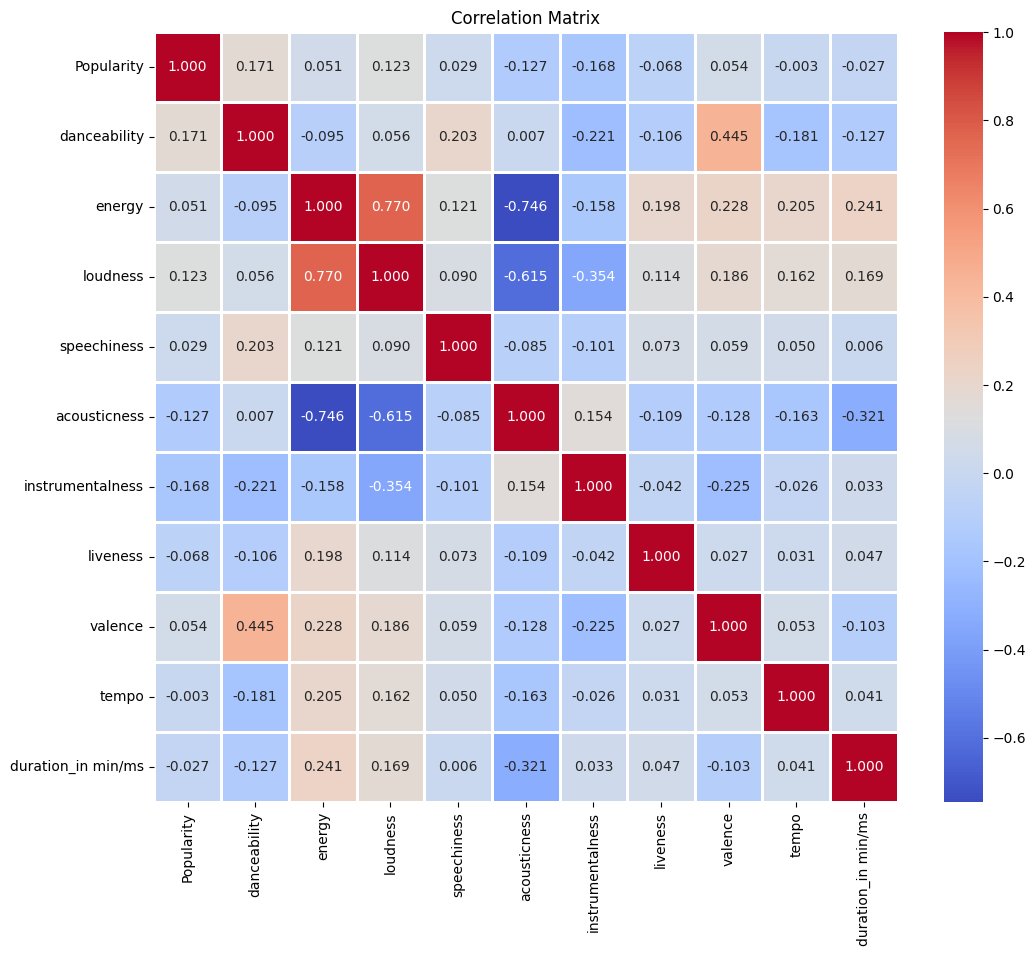

In [43]:
# Visualize the correlation matrix using a heatmap
corr_matrix = train_data[num_cols].corr(numeric_only = True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.8)
plt.title('Correlation Matrix')
plt.show()

In [44]:
# Calculate the correlation matrix
train_data[num_cols].corr(numeric_only = True)

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
Popularity,1.000000,0.171257,0.051190,0.122545,0.028962,-0.127136,-0.168042,-0.067551,0.054102,-0.002864,-0.026686
danceability,0.171257,1.000000,-0.094806,0.056193,0.202985,0.007414,-0.221291,-0.105949,0.444798,-0.180764,-0.127245
energy,0.051190,-0.094806,1.000000,0.769586,0.120869,-0.746436,-0.157831,0.197802,0.227542,0.205421,0.241190
loudness,0.122545,0.056193,0.769586,1.000000,0.090473,-0.614967,-0.354118,0.113663,0.185779,0.161750,0.169003
speechiness,0.028962,0.202985,0.120869,0.090473,1.000000,-0.084849,-0.100634,0.072569,0.059227,0.049739,0.006253
acousticness,-0.127136,0.007414,-0.746436,-0.614967,-0.084849,1.000000,0.153903,-0.109400,-0.127707,-0.162988,-0.321357
instrumentalness,-0.168042,-0.221291,-0.157831,-0.354118,-0.100634,0.153903,1.000000,-0.041922,-0.225017,-0.026454,0.032569
liveness,-0.067551,-0.105949,0.197802,0.113663,0.072569,-0.109400,-0.041922,1.000000,0.027385,0.030776,0.046579
valence,0.054102,0.444798,0.227542,0.185779,0.059227,-0.127707,-0.225017,0.027385,1.000000,0.053439,-0.102725
tempo,-0.002864,-0.180764,0.205421,0.161750,0.049739,-0.162988,-0.026454,0.030776,0.053439,1.000000,0.040955


### Histograms

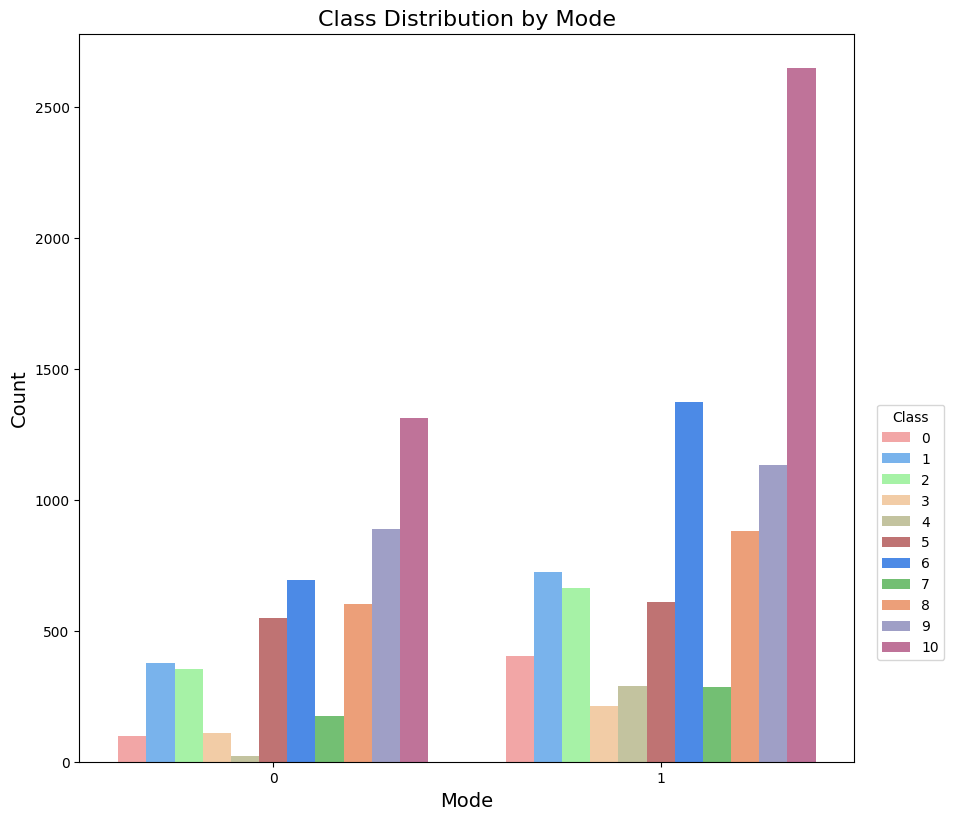

In [45]:
# Visualization for Class Distribution by Mode

# Visualization for 'Class' vs. 'mode'
plt.figure(figsize=(10, 8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c9c999','#cc6666', '#3385ff', '#66cc66', '#ff9966', '#9999cc', '#cc6699']
ax = sns.countplot(data=train_data, x='mode', hue='Class', palette= colors)
plt.title('Class Distribution by Mode', fontsize=16)
plt.xlabel('Mode', fontsize=14)
plt.ylabel('Count', fontsize=14)
legend = plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1.02, 0.5))

plt.subplots_adjust(top=1.02)
plt.show()

**Insights: 'Class' Distribution by 'Mode'**

Analyzing the countplot of 'Class' distribution by 'mode' reveals interesting patterns in how different music genres are represented across these two modes (likely major and minor):

**- Mode 0 (Minor):**

- Dominance of Certain Genres: Classes 10, 9, and 8 are the most prevalent in this mode, suggesting these genres might favor a minor tonality.
- Underrepresentation of Others: Classes 3, 4, and 7 appear less frequently, indicating a potential dislike for minor keys within these genres.

**Mode 1 (Major):**

- Shift in Genre Distribution: While Class 10 remains dominant, Class 6, which was prominent in Mode 0, becomes significantly less frequent. This suggests a strong preference for major keys in Class 6.
- Increased Representation: Genres like Classes 1, 2, and 4 show a notable increase in representation compared to Mode 0, indicating a potential affinity for major keys.

**Overall:**

- Mode Preference: There's a clear shift in genre distribution between the two modes, suggesting that certain genres gravitate towards either major or minor tonalities.
- Predictive Power: The 'mode' feature could be a valuable predictor in a genre classification model, helping distinguish between genres with distinct modal preferences.

Note: Association between mode and Class:
Chi-Squared Statistic: 334.18
P-value: 0.000

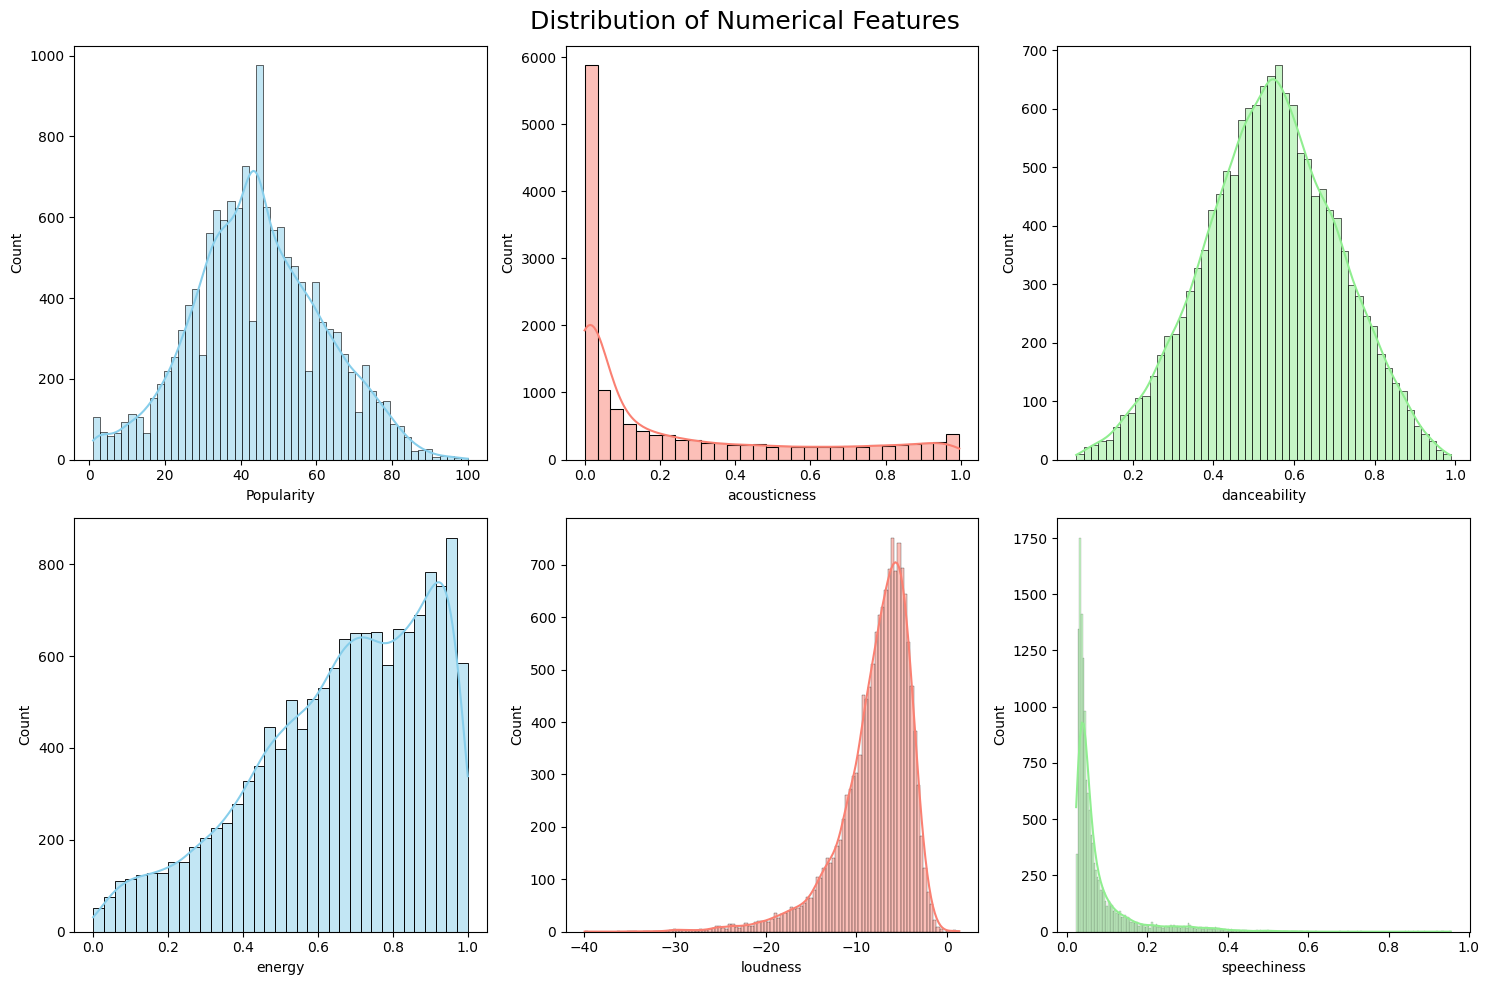

In [46]:
# Visualize distributions of numerical features ['Popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(train_data['Popularity'], ax=axes[0, 0], kde=True, color='skyblue')

sns.histplot(train_data['acousticness'], ax=axes[0, 1], kde=True, color='salmon')

sns.histplot(train_data['danceability'], ax=axes[0, 2], kde=True, color='lightgreen')

sns.histplot(train_data['energy'], ax=axes[1, 0], kde=True, color='skyblue')

sns.histplot(train_data['loudness'], ax=axes[1, 1], kde=True, color='salmon')

sns.histplot(train_data['speechiness'], ax=axes[1, 2], kde=True, color='lightgreen')

plt.suptitle("Distribution of Numerical Features", fontsize=18)

# Exploring Numerical Feature Distributions
plt.tight_layout()
plt.show()

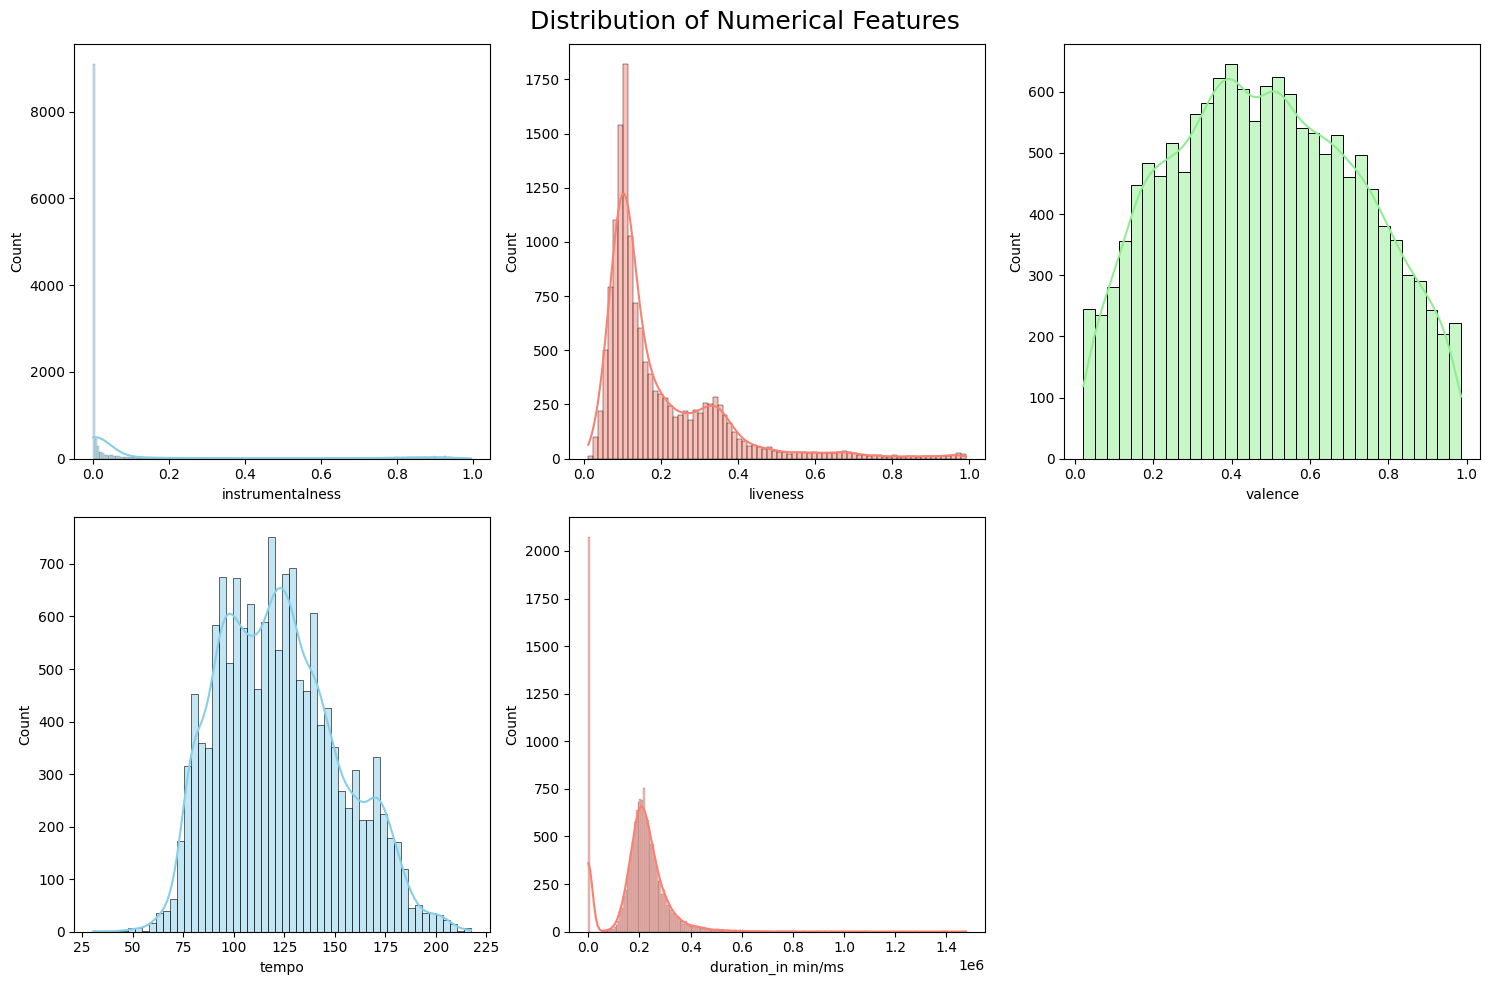

In [47]:
# Visualize distributions of numerical features ['instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(train_data['instrumentalness'], ax=axes[0, 0], kde=True, color='skyblue')

sns.histplot(train_data['liveness'], ax=axes[0, 1], kde=True, color='salmon')

sns.histplot(train_data['valence'], ax=axes[0, 2], kde=True, color='lightgreen')

sns.histplot(train_data['tempo'], ax=axes[1, 0], kde=True, color='skyblue')

sns.histplot(train_data['duration_in min/ms'], ax=axes[1, 1], kde=True, color='salmon')

axes[1, 2].set_axis_off()
plt.suptitle("Distribution of Numerical Features", fontsize=18)

plt.tight_layout()
plt.show()

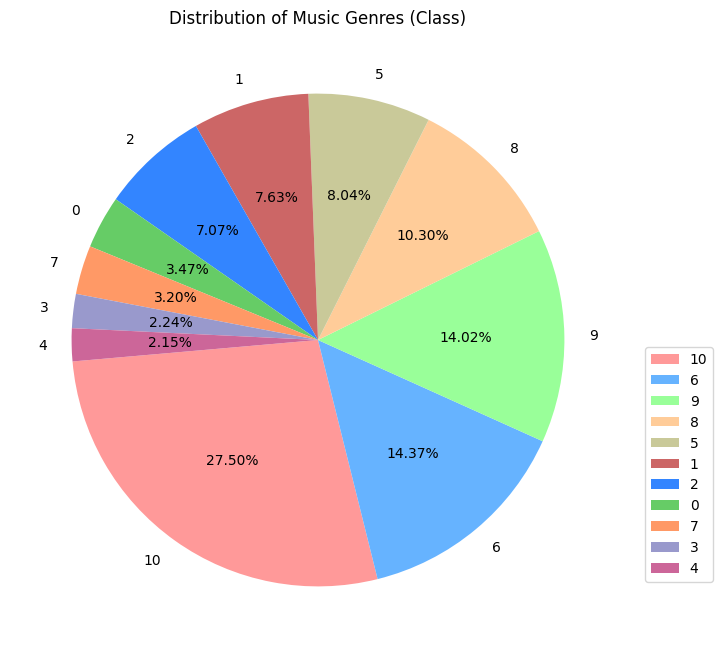

In [48]:
# Visualize 'Class' column

# Count the occurrences of each Music Genres in the "Class" column
class_counts = train_data["Class"].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c9c999','#cc6666', '#3385ff', '#66cc66', '#ff9966', '#9999cc', '#cc6699']

# Create a figure with a black background
fig = plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.2f%%',
    startangle=185,
    colors=colors
)

# Set the title font size and add space between title and pie chart
plt.title("Distribution of Music Genres (Class)")

# Create a separate legend with a white background
legend = plt.legend(class_counts.index, loc='upper left', bbox_to_anchor=(1.02, 0.5))

plt.show()

**Insights**

- Class Imbalance: The dataset exhibits class imbalance, with Class 10 being the most frequent (27.50%) and Classes 3 and 4 being the least frequent (around 2%).
- Dominant Genres: Classes 10, 9, and 6 represent a significant portion of the dataset, indicating their potential dominance in the music collection.

- The pie chart reveals a skewed class distribution in the dataset, with certain music genres (Classes 10, 9, 6) being significantly more represented than others (Classes 3, 4).

- This imbalance necessitates strategies like resampling or cost-sensitive learning during model training to ensure accurate predictions across all genres.

This insight highlights the importance of addressing class imbalance for building a robust and reliable music genre classification model.

**Recommendation from insights**
- Handling Class Imbalance: To improve model performance on underrepresented music genres, we used cost-sensitive learning. This means we gave more weight to errors on minority classes during training, using the class_weight parameter for supported models like XGBoostClassifier.

- We recognized the issue of class imbalance, used a specific technique (class_weight) to address it, and applied it strategically to relevant models.

- This technique, implemented using the class_weight parameter for supported models (e.g., XGBoostClassifier), aims to enhance the model's ability to learn patterns from all genres and make more accurate predictions across the board.

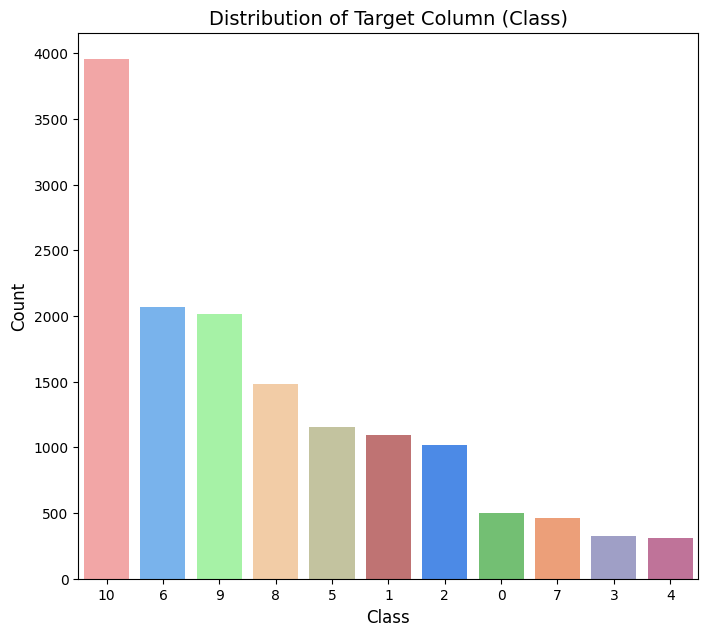

In [49]:
# Calculate the counts of each class in the target variable "Class"
class_counts = train_data['Class'].value_counts()

# Create a figure with a black background
plt.figure(figsize=(8, 6))

# Define colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c9c999','#cc6666', '#3385ff', '#66cc66', '#ff9966', '#9999cc', '#cc6699']

sns.countplot(data=train_data, x='Class',palette=colors, order=class_counts.index)
plt.title('Distribution of Target Column (Class)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplots_adjust(top=1.02)
plt.show()

**Class Distribution and Imbalance**

A bar chart visualization of the target variable ('Class') reveals a significant class imbalance in the dataset. Some music genres are heavily represented (e.g., Class 10, Class 6), while others are underrepresented (e.g., Class 4, Class 3). This imbalance will be addressed during model training using techniques like resampling or cost-sensitive learning to ensure accurate predictions across all genres.

**Insight: Some Music Genres Are More Common Than Others**

We found that some music genres appear much more often in our data than others. This could be a problem when we build our music genre prediction model, as it might not learn to recognize the less common genres as well. We'll need to use special techniques to make sure the model learns from all genres, even the rare ones.

In [50]:
# Dropping Irrelevant Columns
train_data = train_data.drop(["Artist Name", "Track Name"], axis=1)

In [51]:
# Checking for Duplicate Rows after dropping irrelevant columns

# Counting Duplicate Rows
train_data.duplicated().sum()

24

In [52]:
# Dropping duplicate rows
train_data = train_data.drop_duplicates()

# Checking for remaining duplicates
print(train_data.duplicated().sum())

0


In [53]:
# Getting the number of instances and features
train_data.shape

(14372, 15)

In [54]:
# Replace outliers with upper/lower bounds using IQR
for col in num_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    train_data[col] = np.where(train_data[col] > upper_bound, upper_bound,
                                 np.where(train_data[col] < lower_bound, lower_bound, train_data[col]))

In [55]:
# Counting Duplicate Rows
train_data.duplicated().sum()

2

In [56]:
# Dropping duplicate rows
train_data = train_data.drop_duplicates()

# Checking for remaining duplicates
print(train_data.duplicated().sum())

0


# Preprocessing 

In [57]:
# cat_cols = ['Artist Name','Track Name','mode', 'key', 'time_signature', 'Class']

# List of categorical features with high cardinality (many unique values)
cat_cols_high_cardinality = []  #  'Artist Name', 'Track Name'

In [58]:
# List of categorical features with low cardinality (few unique values)
cat_cols_low_cardinality = ['key', 'mode', 'time_signature']  # 'mode', 'key' & 'time_signature' are not high-cardinality feature

In [59]:
from sklearn.base import TransformerMixin

class FrequencyEncodeTransformer(TransformerMixin):

    # Define frequency encoding function
    def frequency_encoding(self,X, column):
       # Calculate the frequency of each unique value in the column (using value_counts())
       freq = X[column].value_counts().to_dict()
       # Replace the original values with their corresponding frequencies (using Mapping)
       return X[column].map(freq)

    # Frequency encoding for high cardinality features
    def encode_high_cardinality(self,X):
        for col in X.columns:
           X[col] = self.frequency_encoding(X, col)
        return X

    # Fit method
    def fit(self, X, y=None):
        return self  # Returns the names of the features after transformation.
    # Transform method
    def transform(self, X):
            return self.encode_high_cardinality(X)
    # Get feature names
    def get_feature_names_out(self, input_features=None): # input_features: Optional list of input feature names.
        return input_features  # Returns: The original feature names as frequency encoding doesn't change them.

**Note**

**Data Preprocessing: Handling High-Cardinality Features**

Within the data preprocessing pipeline, high-cardinality categorical features are addressed using a custom transformer called FrequencyEncodeTransformer. This transformer applies frequency encoding, replacing each unique category with its frequency of occurrence in the dataset. This technique effectively manages the dimensionality challenges posed by high-cardinality features, enabling their use in machine learning models without significantly increasing the feature space.

By incorporating this specialized transformer, the preprocessing pipeline ensures that categorical features, regardless of their cardinality, are appropriately transformed into numerical representations suitable for model training.

In [60]:
# List of numerical features with right skew distribution
num_cols_right_skew = ['acousticness', 'speechiness', 'liveness', 'instrumentalness']
# List of numerical features with leftt skew distribution
num_cols_left_skew = ['loudness', 'energy', 'duration_in min/ms']
# List of numerical features
num_cols_P = ['Popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'instrumentalness', 'duration_in min/ms']

In [61]:
# Define PowerTransformer for handling skewed features
power_transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# Define numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', RobustScaler(with_centering=False)),
    #('scaler', StandardScaler(with_mean=False))     # Standardize numerical features
])

# Combine transformation and numerical pipeline
log_num_pipeline = Pipeline(steps=[
    ('power_transform', ColumnTransformer(
        transformers=[
            ('power', power_transformer, ['acousticness', 'speechiness', 'liveness', 'instrumentalness', 'loudness', 'energy', 'duration_in min/ms', 'Popularity'])
        ],
        remainder='passthrough'
    )),
    ('num_pipeline', num_pipeline)
])

**Handling Skewed in Numerical Features**

Analysis of the features revealed a right skew in 'acousticness','speechiness', and similar characteristics. This means most music have lower values for these features, with a few outliers having much higher values. Conversely, we observed a left skew in features like 'loudness', indicating a concentration of values at the higher end of the spectrum. To improve the accuracy of our genre prediction model, particularly in the final prediction stage, we applied a Power Transformation to these features. This mathematical technique helps balance the distribution of values, ensuring the model learns from the full spectrum of acoustic characteristics and, as a result, makes more accurate genre predictions. This helps to balance out the distribution of values, giving the model a better chance of learning patterns from all types of music, not just those with extreme values for these features.

This explanation emphasizes:

- The Issue: Right-skewed & Left-skewed distributions in specific numerical features.
- The Impact: Potential negative impact on model accuracy, particularly for less common music genres.
- The Solution: PowerTransformer to balance the data and improve model learning.
- The Goal: Building a more accurate and reliable music genre prediction model.

**Note:**
- PowerTransformer is a technique for normalizing data, particularly when dealing with skewed distributions. This can reduce the disproportionate impact of outliers on machine learning models, leading to more robust predictions.
- PowerTransformer with the method='yeo-johnson' to handle both left and right skewness, as Yeo-Johnson works for both positive and negative values

**Numerical Feature Preprocessing**

The numerical features undergo a three-step preprocessing pipeline:

- **Imputation:** Missing values in numerical features are imputed using the median value of each respective feature. This ensures that all features have complete data for subsequent processing.
- **Power Transformation:** To address the issue of skewed distributions in certain numerical features, a Power Transformation is applied using the Yeo-Johnson method. This technique normalizes the data, reducing the disproportionate influence of outliers and enabling the model to learn effectively from the full range of values.
- **Standardization:** All numerical features are then standardized using StandardScaler(with_mean=False). This scales the features to have zero mean and unit variance, which can improve the performance of many machine learning models.

Categorical Feature Preprocessing

In [62]:
# Define categorical pipelines
# Pipeline - Frequency encoding for high-cardinality features
#freq_pipeline = Pipeline(steps=[
    #('encode', FrequencyEncodeTransformer()),
    #('scaler', RobustScaler(with_centering=False))
    #('scaler', StandardScaler(with_mean=False))
#])

# Pipeline - One-hot encoding for low-cardinality features
onehot_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', RobustScaler(with_centering=False))
    #('scaler', StandardScaler(with_mean=False))
])

In [63]:
# Combine pipelines into a ColumnTransformer
full_pipeline = ColumnTransformer(
    transformers=[
        ('log_num', log_num_pipeline, num_cols_P),
        #('freq', freq_pipeline, cat_cols_high_cardinality),
        ('onehot', onehot_pipeline, cat_cols_low_cardinality)
    ]
)

**Note**

**Data Preprocessing Pipeline**

To prepare both numerical and categorical features for machine learning, a comprehensive preprocessing pipeline is constructed. This pipeline leverages the power of scikit-learn's ColumnTransformer to apply different transformations to different feature types.

1. Numerical Feature Preprocessing
The numerical features undergo the following steps:

- Imputation: Missing values are replaced with the median value of the respective feature. This strategy helps maintain the overall distribution of the data.
- Standardization: Numerical features are scaled to have zero mean and unit variance, ensuring that they contribute equally to the model training process.

2. Categorical Feature Preprocessing
To handle categorical features with varying cardinality, two distinct pipelines are defined:

- Frequency Encoding Pipeline: This pipeline is designed for high-cardinality features (those with a large number of unique values).
- One-Hot Encoding Pipeline: This pipeline caters to low-cardinality features (those with a limited number of unique values).

3. Combining Pipelines with ColumnTransformer:
The ColumnTransformer orchestrates the application of these pipelines to the appropriate feature groups

This structured approach ensures that each feature type receives the most suitable preprocessing, optimizing the data for machine learning model training.

## Create a Test Set and Train Set

In [64]:
# Define features (X) and target (Y)

# labeled data here is 'Class' Column

X = train_data.drop('Class', axis=1)

Y = train_data['Class']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)   # test_size=0.3, random_state=111
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11496, 14), (2874, 14), (11496,), (2874,))

### Applying processing pipline

In [65]:
# Apply processing pipeline
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
# Get feature names after transformation
feature_names = full_pipeline.get_feature_names_out()
print(feature_names)

['log_num__power__acousticness' 'log_num__power__speechiness'
 'log_num__power__liveness' 'log_num__power__instrumentalness'
 'log_num__power__loudness' 'log_num__power__energy'
 'log_num__power__duration_in min/ms' 'log_num__power__Popularity'
 'log_num__remainder__danceability' 'log_num__remainder__valence'
 'log_num__remainder__tempo' 'onehot__key_1.0' 'onehot__key_2.0'
 'onehot__key_3.0' 'onehot__key_4.0' 'onehot__key_5.0' 'onehot__key_6.0'
 'onehot__key_7.0' 'onehot__key_8.0' 'onehot__key_9.0' 'onehot__key_10.0'
 'onehot__key_11.0' 'onehot__mode_0' 'onehot__mode_1'
 'onehot__time_signature_1' 'onehot__time_signature_3'
 'onehot__time_signature_4' 'onehot__time_signature_5']


# Select and Train a Model

In [66]:
# Select and Train a Model

fitted_models = {}  # Initialize a dictionary to store fitted models

def train_model(model,model_name):

  # Calculate class weights - calculating weights based on class frequencies
  class_weights = compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)
  class_weight_dict = dict(enumerate(class_weights))

  # Train the model with selected features AND class weights IF SUPPORTED
  if hasattr(model, 'class_weight'):
    try: # Attempt to fit with class weights
      model.fit(X_train_prepared, Y_train, class_weight=class_weight_dict)
      print(f"{model_name} supports class weights and has been trained accordingly.")
    except TypeError as e:  # If TypeError (likely due to unsupported class_weight), train without it
      if "class_weight" in str(e): # Check if the error is specifically about class_weight
        model.fit(X_train_prepared, Y_train)
        print(f"{model_name} does not support class weights. Trained without them.")
      else:
        # If a different TypeError, raise it for further investigation
        raise e
  else:
    model.fit(X_train_prepared, Y_train)

  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_prepared, Y_train, cv=5, scoring='f1_weighted')
  # Make predictions
  predictions = model.predict(X_test_prepared)
  # Evaluate the model
  f1 = f1_score(Y_test,predictions, average='weighted')  # , average='weighted'
  recall = recall_score(Y_test,predictions, average='weighted')  # , average='weighted'
  accuracy = accuracy_score(Y_test,predictions)
  precision = precision_score(Y_test,predictions, average='weighted')  # , average='weighted'

  # Store the metrics in a dictionary
  metrics = {
      'Algorithm': model_name,
      'F1-Score': f1,
      'Recall': recall,
      'Accuracy': accuracy,
      'Precision': precision,
      'Cross-Val F1 Scores': cv_scores,
      'Avg Cross-Val F1': cv_scores.mean()
      }

  fitted_models[model_name] = model  # Store the fitted model
  return model, metrics

# Initialize a dictionary to store the results
results = {}

### XGB

In [67]:
# XGBClassifier
xgbboost, metrics = train_model(xgb.XGBClassifier(objective='binary:logistic'), "XGBClassifier")

results['XGBClassifier'] = metrics

In [68]:
results['XGBClassifier']

{'Algorithm': 'XGBClassifier',
 'F1-Score': 0.4955485115918306,
 'Recall': 0.5086986778009742,
 'Accuracy': 0.5086986778009742,
 'Precision': 0.4911874672825021,
 'Cross-Val F1 Scores': array([0.48638804, 0.48922144, 0.48956536, 0.48984317, 0.48411124]),
 'Avg Cross-Val F1': 0.4878258490409113}

### Cat Boost Classifier

In [69]:
# Cat Boost Classifier
cbc, metrics = train_model(cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass'), "CatBoostClassifier")

results['CatBoostClassifier'] = metrics

In [70]:
results['CatBoostClassifier']

{'Algorithm': 'CatBoostClassifier',
 'F1-Score': 0.5144465102098724,
 'Recall': 0.5313152400835073,
 'Accuracy': 0.5313152400835073,
 'Precision': 0.5112942547316827,
 'Cross-Val F1 Scores': array([0.49173936, 0.50002951, 0.49848408, 0.50302227, 0.48787341]),
 'Avg Cross-Val F1': 0.4962297252525293}

### Stacking

In [71]:
# Define base models for stacking
base_models = [
('cbc', cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass')),
('xgb', xgb.XGBClassifier(objective='binary:logistic')),
('lgbm', lgb.LGBMClassifier(verbose=-1)),
('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Initialize StackingClassifier with a meta-model (LogisticRegression in this case)

# Train the stacking model
stacking_model, metrics = train_model(StackingClassifier(estimators=base_models, final_estimator=LogisticRegression()), "StackingClassifier")

# Store stacking results
results['StackingClassifier'] = metrics

In [73]:
results['StackingClassifier']

{'Algorithm': 'StackingClassifier',
 'F1-Score': 0.5529504917375768,
 'Recall': 0.5608907446068198,
 'Accuracy': 0.5608907446068198,
 'Precision': 0.5701347571022503,
 'Cross-Val F1 Scores': array([0.54105941, 0.53312999, 0.52763273, 0.54546098, 0.54409012]),
 'Avg Cross-Val F1': 0.538274644980641}

In [74]:
# Find the best model based on F1-Score
best_model_name = max(results, key=lambda k: results[k]['F1-Score'])
best_Metric = results[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Metrics: {best_Metric}")

Best Model: StackingClassifier
Metrics: {'Algorithm': 'StackingClassifier', 'F1-Score': 0.5529504917375768, 'Recall': 0.5608907446068198, 'Accuracy': 0.5608907446068198, 'Precision': 0.5701347571022503, 'Cross-Val F1 Scores': array([0.54105941, 0.53312999, 0.52763273, 0.54546098, 0.54409012]), 'Avg Cross-Val F1': 0.538274644980641}


In [75]:
# Ensemble method using VotingClassifier
ensemble = VotingClassifier(estimators=[
    ('cbc', cbc),
    ('xgb', xgbboost),
    ('stacking', stacking_model)
], voting='soft')

ensemble.fit(X_train_prepared, Y_train)

VotingClassifier(estimators=[('cbc',
                              <catboost.core.CatBoostClassifier object at 0x7d6a7739ffa0>),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=N...
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=None,
                                                                            max_leaves=None,
                                                                            min_child_weight=None,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=None,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None,
                                                                            random_state=None, ...)),
                                                             ('lgbm',
                                                              LGBMClassifier(verbose=-1)),
                                                             ('rf',
                                                              RandomForestClassifier(random_state=42))],
                                                 final_estimator=LogisticRegression()))],
                 voting='soft')

In [76]:
# Evaluate ensemble model
ensemble_pred = ensemble.predict(X_test_prepared)
ensemble_f1 = f1_score(Y_test, ensemble_pred, average='weighted')

print(f'Ensemble Voting Classifier F1 Score: {ensemble_f1}')

Ensemble Voting Classifier F1 Score: 0.5154158896471976


In [77]:
# Store ensemble results
results['Ensemble'] = {'F1-Score': ensemble_f1}  # Assuming you have a 'results' dictionary from previous response

In [79]:
results['Ensemble'] = metrics
results['Ensemble']

{'Algorithm': 'StackingClassifier',
 'F1-Score': 0.5529504917375768,
 'Recall': 0.5608907446068198,
 'Accuracy': 0.5608907446068198,
 'Precision': 0.5701347571022503,
 'Cross-Val F1 Scores': array([0.54105941, 0.53312999, 0.52763273, 0.54546098, 0.54409012]),
 'Avg Cross-Val F1': 0.538274644980641}

In [78]:
# Find the best model based on F1-Score
best_model_name = max(results, key=lambda k: results[k]['F1-Score'])
best_model = results[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"F1-Score: {best_model['F1-Score']}")  # Print only the F1-Score

Best Model: StackingClassifier
F1-Score: 0.5529504917375768


In [80]:
best_model

{'Algorithm': 'StackingClassifier',
 'F1-Score': 0.5529504917375768,
 'Recall': 0.5608907446068198,
 'Accuracy': 0.5608907446068198,
 'Precision': 0.5701347571022503,
 'Cross-Val F1 Scores': array([0.54105941, 0.53312999, 0.52763273, 0.54546098, 0.54409012]),
 'Avg Cross-Val F1': 0.538274644980641}

In [81]:
best_model_f1 = fitted_models[best_model_name]  # Retrieve the best model

In [82]:
# Load the test dataset
test_data = pd.read_csv('/content/test (2).csv')

In [83]:
print(test_data.head())

      Id      Artist Name                    Track Name  Popularity  \
0  14397  Juan Pablo Vega  Matando (feat. Vic Mirallas)         NaN   
1  14398        Kappi Kat                       Baarish        14.0   
2  14399  Plain White T's             Hey There Delilah        80.0   
3  14400    WALK THE MOON              Different Colors        52.0   
4  14401            Peled                      ◊ß◊®◊ô◊ñ        23.0   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.691   0.670  2.0    -7.093     0       0.0941      0.075700   
1         0.461   0.777  2.0    -7.469     1       0.0306      0.388000   
2         0.656   0.291  2.0   -10.572     1       0.0293      0.872000   
3         0.480   0.826  NaN    -4.602     1       0.0397      0.000797   
4         0.734   0.729  1.0    -6.381     0       0.2830      0.147000   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0          0.035200    0.1970    0.635   89.965    

In [84]:
id_values = test_data['Id']
test_data = test_data.drop(["Id"],axis=1)
test_data = test_data.drop(["Artist Name", "Track Name"], axis=1)

In [85]:
test_data.shape

(3600, 14)

In [86]:
test_data_prepared = full_pipeline.transform(test_data)

In [87]:
# Make predictions using the best model
test_predictions = best_model_f1.predict(test_data_prepared)

In [88]:
test_predictions

array([10, 10,  9, ...,  6,  2, 10])

In [89]:
# Ensure test_predictions is a 1D array
test_predictions = test_predictions.flatten()

In [90]:
# Create a submission DataFrame
submission = pd.DataFrame({'Class': test_predictions})

In [91]:
submission['Id']= id_values

In [92]:
# Reorder the columns to have 'Id' first
submission = submission[['Id', 'Class']]
submission

,Id,Class
0,14397,10
1,14398,10
2,14399,9
3,14400,10
4,14401,5
...,...,...
3595,17992,10
3596,17993,9
3597,17994,6
3598,17995,2


In [93]:
# Save predictions to a CSV file
submission.to_csv('submission.csv', index=False)

# The Best Scroe NoteBooke

### Processing Pipline 

In [8]:
# Define numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='s')),  # Impute missing values with median
    ('scaler', StandardScaler())                   # Standardize numerical features
])

In [9]:
# Define categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('encode', FrequencyEncodeTransformer()),
    ('scaler', StandardScaler())    
])

In [10]:
from sklearn.preprocessing import FunctionTransformer


# Function to extract a single column from DataFrame
def get_text_column(X, column_name):
    return X[column_name]



track_tfidf_pipeline = Pipeline(steps=[
    ('extract_text', FunctionTransformer(get_text_column, kw_args={'column_name': 'Track Name'}, validate=False)),
    ('tfidf', TfidfVectorizer())
])

In [11]:
# Combine pipelines into a ColumnTransformer
full_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols_high_cardinality),
        ('text', track_tfidf_pipeline, text_cols)
    ])

## Create a Test Set and Train Set

In [12]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((11516, 18), (2880, 18))

In [13]:
target_feature= "Class"
X_train = train_set.drop(target_feature, axis=1)
y_train = train_set[target_feature].copy()

X_test = test_set.drop(target_feature, axis=1)
y_test = test_set[target_feature].copy()

### Applying processing pipline

In [14]:
X_train_prepared= full_pipeline.fit_transform(X_train)
X_test_prepared= full_pipeline.transform(X_test)
# full_pipeline.get_feature_names_out()

# Select and Train a Model

In [15]:
def train_model(model,model_name):
    
    model.fit(X_train_prepared, y_train)
    predictions = model.predict(X_train_prepared)
    rmse = root_mean_squared_error(y_train, predictions)
    r2 = r2_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='weighted')

    print(f"Model {model_name}")
    print(f"RMSE is:     {rmse}\nR2 Score is: {r2}\nF1 Score is:{f1}")
    return model

In [16]:
def test_model(model,model_name):
    
    # model.fit(X_test_prepared, y_test)
    predictions = model.predict(X_test_prepared)
    rmse = root_mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')

    print(f"Model {model_name}")
    print(f"RMSE is:     {rmse}\nR2 Score is: {r2}\nF1 Score is:{f1}")


### Random Forest

In [39]:
forest_cl= train_model(RandomForestClassifier(n_estimators=100, random_state=42),"RandomForestClassifier")

Model RandomForestClassifier
RMSE is:     1.368370690510485
R2 Score is: 0.8173686618235552
F1 Score is:0.9384622289270622


In [41]:
test_model(forest_cl,"RandomForestClassifier")

Model RandomForestClassifier
RMSE is:     0.7397447007057383
R2 Score is: 0.9472791114956168
F1 Score is:0.9835945958872528


### XGB

In [56]:
xgb_cl= train_model(xgb.XGBClassifier(), "XGBClassifier")


Model XGBClassifier
RMSE is:     2.385243944887782
R2 Score is: 0.4450761653766876
F1 Score is:0.78412998453656


### Stacking

In [63]:
# Define base models for stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Meta-model for stacking (e.g., Logistic Regression)
meta_model = LogisticRegression()

# Stacking ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [64]:
st_cl= train_model(stacking_model,"StackingClassifier")

Model StackingClassifier
RMSE is:     3.099751247736901
R2 Score is: 0.06282334551955704
F1 Score is:0.5773693938215488


In [67]:
test_model(st_cl,"StackingClassifier")

Model StackingClassifier
RMSE is:     3.333958274750567
R2 Score is: -0.07087632157507184
F1 Score is:0.5551381238599363


In [23]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]

meta_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [24]:
st_cl2= train_model(stacking_model,"StackingClassifier") #0.63
test_model(st_cl2,"StackingClassifier")

Model StackingClassifier
RMSE is:     4.388936642161273
R2 Score is: -0.8788252909001877
F1 Score is:0.31734807261334097
Model StackingClassifier
RMSE is:     3.227109559824567
R2 Score is: -0.003336046263936243
F1 Score is:0.5808585951635704


### VotingClassifier

In [17]:
from sklearn.ensemble import VotingClassifier

# Define individual models
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model3 = LogisticRegression()

# Voting ensemble (Soft Voting)
voting_model = VotingClassifier(estimators=[
    ('rf', model1), 
    ('gb', model2), 
    ('lr', model3)
], voting='soft')

v_cl= train_model(voting_model,"VotingClassifier")
test_model(v_cl,"VotingClassifier")

Model VotingClassifier
RMSE is:     1.9443231463403734
R2 Score is: 0.6312732315767045
F1 Score is:0.8668535109872241
Model VotingClassifier
RMSE is:     3.506293944070038
R2 Score is: -0.184447017306278
F1 Score is:0.5045411453475064


### CatBoost

In [18]:
# cb_cl= train_model(CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass'), "CatBoostClassifier")


# Fine Tuning

In [42]:
def show_scores(y,predictions):
    rmse = root_mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    f1 = f1_score(y, predictions, average='weighted')
    print(f"RMSE is:     {rmse}\nR2 Score is: {r2}\nF1 Score is:{f1}")


In [49]:
def grideSearch(model,param_grid):
    # Perform grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_weighted')
    grid_search.fit(X_train_prepared,  y_train)

    print(f"Gride Seach for Model: {model}")
    # Print the best parameters and best score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    # Use the best model for predictions
    best_model = grid_search.best_estimator_

    predictions = best_model.predict(X_train_prepared)
    print("\nresults")
    print("Training")
    show_scores(y_train,predictions)

    predictions = best_model.predict(X_test_prepared)
    print("Testing")
    show_scores(y_test,predictions)
    return best_model


In [66]:
### Bad results
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf_cl_best_model= grideSearch(RandomForestClassifier(),param_grid)

# Testing

In [19]:
test_data= pd.read_csv("test.csv")
test_data.shape

(3600, 17)

### Processing

In [20]:
# test_data_encoded= encode_high_cardinality(test_data,cat_cols_high_cardinality)
text_data_prepared= full_pipeline.transform(test_data)

### Predicting

In [21]:
def make_submission_file(model):
    final_predictions = model.predict(text_data_prepared)
    data={'Id':test_data['Id'],'Class':final_predictions }
    sub=pd.DataFrame(data)
    sub.to_csv('submission.csv', index=False)

    # test_predictions = model.predict(text_data_prepared)
    # test_predictions = test_predictions.flatten()
    # submission = pd.DataFrame({'Class': test_predictions})
    # submission['Id']= test_data['Id']
    # submission = submission[['Id', 'Class']]
    # submission.to_csv('submission.csv', index=False)



In [54]:
make_submission_file(forest_cl)

In [25]:
make_submission_file(st_cl2)

In [22]:
make_submission_file(v_cl)